# TASK 4 
# IRISDATASET
### Identifying the  following data to study:
### 1)Id having numerical values
### 2)SepalLengthCm  in centimeters
### 3)SepalWidthCm in centimeters
### 4)PetalLengthCm in centimeters
### 5)PetalLengthCm in centimeters 
### 6)PetalWidthCm in centimeters
### 7)Species having catogorial data ( setosa, versicolour and virginica ) 
# Alogorithms used KNN , Decisiontree.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing dataset

In [2]:
cd C:\Users\dell\Desktop\The sparks foundations\task3

C:\Users\dell\Desktop\The sparks foundations\task3


In [3]:
data=pd.read_csv('Iris123.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 6)

# Data cleaning

In [7]:

data.drop('Id',inplace=True,axis=1)

In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [10]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking unique elements in target variable

In [11]:

data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# im using  class method, we can use label encoding .

In [12]:

classes={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data.replace({'Species':classes},inplace=True)

In [13]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


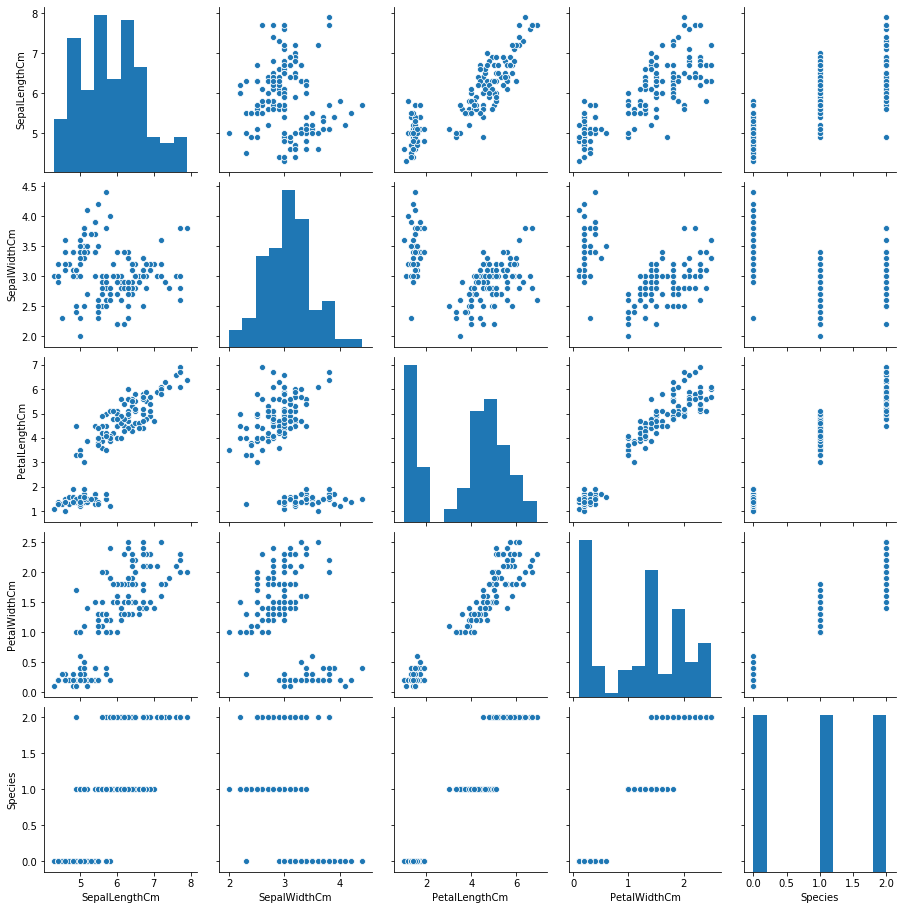

In [15]:
sns.pairplot(data)

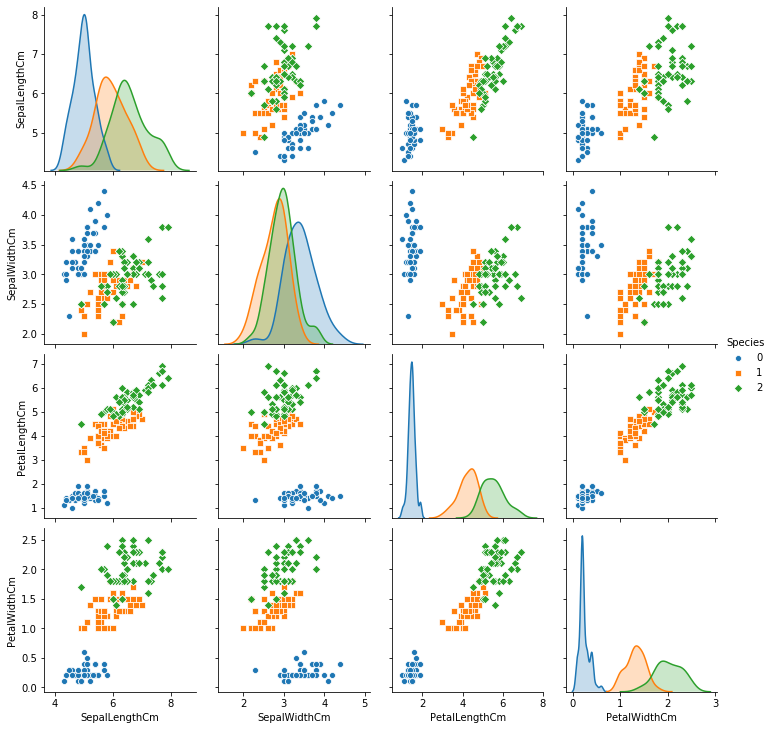

In [16]:
sns.pairplot(data,hue='Species',markers=['o','s','D'])

In [17]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Split the dataset to train and test datasets

In [21]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=18)

In [22]:
x_train

array([[6.3, 3.3, 6. , 2.5],
       [6.4, 3.2, 5.3, 2.3],
       [5.8, 2.7, 3.9, 1.2],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5. , 3.5, 1.3, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 2.9, 4.2, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [5. , 3.5, 1.6, 0.6],
       [6. , 2.2, 4. , 1. ],
       [5.7, 3. , 4.2, 1.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.3, 1.4, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 2.4, 3.3, 1. ],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3. , 1.4, 0.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 2.5, 5.8, 1.8],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3.2, 5.1, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3.9, 1.7, 0.4],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 3

# Check the size of train and test datasets

In [23]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Normalising values: Mean value=0, Standard deviation=1

In [24]:

from sklearn .preprocessing import StandardScaler as ss
scaler = ss()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test= scaler.transform(x_test)

# Classification Algorithm: Logistic Regression

In [25]:

from sklearn.linear_model import LogisticRegression as loreg
logistic=loreg()
logistic.fit(x_train,y_train)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = logistic.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 2 1 2 1 2 1 0 2 0 2 0 2 0 0 1 2 2 1 2 0 0 0 2 2]


# one way to predict the accurancy

In [28]:
print('Accuracy of LogisticRegression on Iris dataset is{}'.format(logistic.score(x_test,y_test))) 

Accuracy of LogisticRegression on Iris dataset is0.9333333333333333


# another way to predict the accuarancy

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

0.9333333333333333
[[11  1  0]
 [ 0  7  1]
 [ 0  0 10]]


# ACCURANCY IS 0.93333)


# Classification Algorithm: K Nearest Neighbors Classifier

In [31]:

from sklearn.neighbors import KNeighborsClassifier as KNN
KNN=KNN()
KNN.fit(x_train,y_train)
print('Accuracy of KNN on Iris dataset is {}'.format(KNN.score(x_test,y_test)))

Accuracy of KNN on Iris dataset is 1.0


In [32]:
z = np.append(arr=y_pred.reshape(len(y_pred),1), values=y_test.reshape(len(y_test),1),axis=1)
print(z)

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]]


In [33]:
# Printing the accuracy score and the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(acc)
print(cm)


0.9333333333333333
[[11  1  0]
 [ 0  7  1]
 [ 0  0 10]]


# ACCURANCY OF KNN IS 0.966666

# creating and training the decision tree algorithm

In [34]:

from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)



In [35]:
print('accurancy',accuracy_score(y_test,y_pred))

accurancy 0.9666666666666667


# To check the model performnace

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2_score(y_train,y_pred_train)
r2_score(y_test,y_pred)

0.9542682926829268

In [42]:
mse

0.03333333333333333

# plotting decision tree

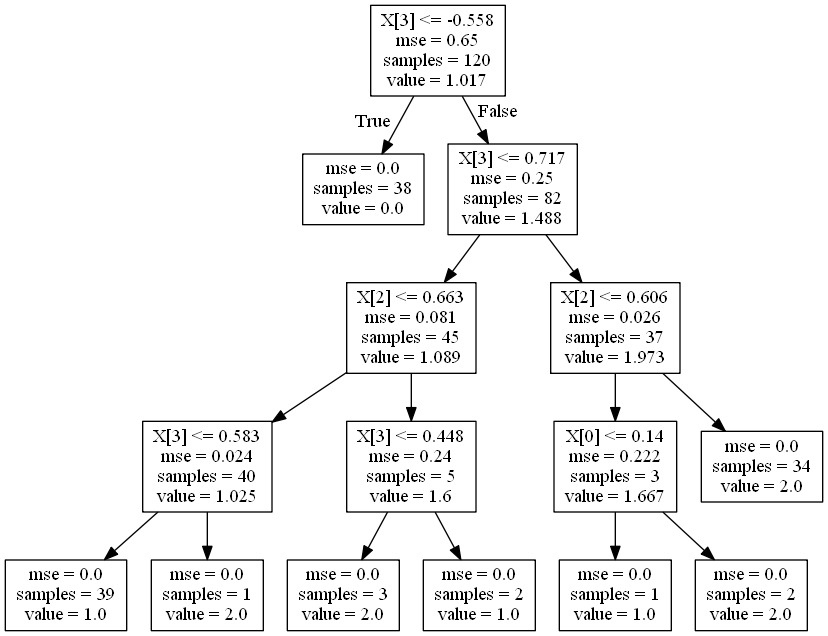

In [37]:
from sklearn import tree 
dot_data=tree.export_graphviz(regressor,out_file=None)
from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

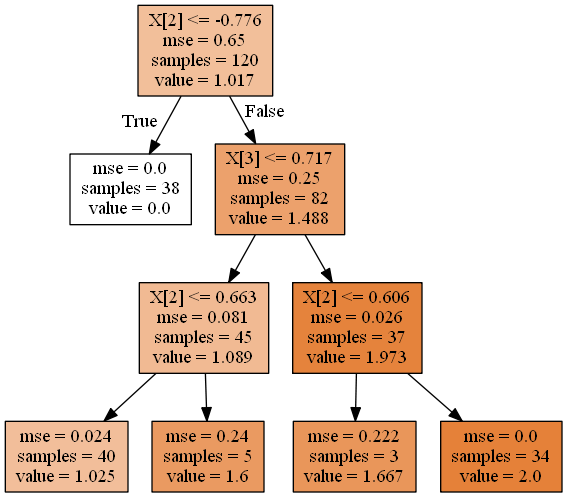

In [38]:
regressor1=tree.DecisionTreeRegressor(max_depth=3)
regressor1.fit(x_train,y_train)
dot_data=tree.export_graphviz(regressor1,out_file=None,filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

# minimum observations at internal node

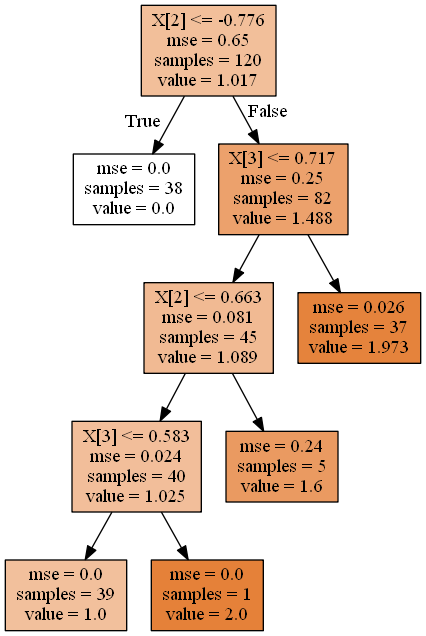

In [39]:
regressor2=tree.DecisionTreeRegressor(min_samples_split=40)
regressor2.fit(x_train,y_train)
dot_data=tree.export_graphviz(regressor2,out_file=None,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

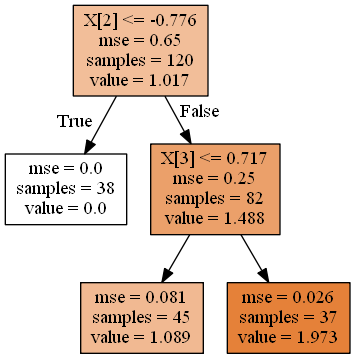

In [40]:
regressor3=tree.DecisionTreeRegressor(min_samples_leaf=25)
regressor3.fit(x_train,y_train)
dot_data=tree.export_graphviz(regressor3,out_file=None,filled=True)
graph3=pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

# Decision tree  accurancy is 0.9666666666666667

# we can assume that the KNN accurancy 0.9333333333333333 , mean_squared_error accurancy is 0.03333333333333333, R2 score is 0.9542682926829268 and  Decision tree accurancy is 0.966666
# Hence we can predict that the Decision tree has the better accurancy than the KNN

# THANK YOU